In [11]:
!pip install tensorflow==2.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    U

In [1]:
import tensorflow  as tf
tf.__version__

'2.12.0'

In [2]:
!unzip /content/Fluid-AI-Project.zip -d project_data

Archive:  /content/Fluid-AI-Project.zip
   creating: project_data/content/project_data/
  inflating: project_data/content/project_data/keras_model.h5  
   creating: project_data/content/project_data/__MACOSX/
   creating: project_data/content/project_data/__MACOSX/Validation_data/
   creating: project_data/content/project_data/__MACOSX/Validation_data/num8/
  inflating: project_data/content/project_data/__MACOSX/Validation_data/num8/._img009-032.png  
  inflating: project_data/content/project_data/__MACOSX/Validation_data/num8/._img009-031.png  
  inflating: project_data/content/project_data/__MACOSX/Validation_data/num8/._img009-038.png  
  inflating: project_data/content/project_data/__MACOSX/Validation_data/num8/._img009-037.png  
  inflating: project_data/content/project_data/__MACOSX/Validation_data/num8/._img009-034.png  
  inflating: project_data/content/project_data/__MACOSX/Validation_data/num8/._img009-033.png  
  inflating: project_data/content/project_data/__MACOSX/Validati

In [ ]:
# Importing Required libs.

In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt


In [4]:
# loading trained model
model = tf.keras.models.load_model("/content/project_data/content/project_data/keras_model.h5")

In [5]:
# dictionary to map class names to integer labels
mycls = {'class_0': 1, 'class_1': 2, 'class_2': 3,
         'class_3': 4, 'class_4': 5, 'class_5': 6,
         'class_6': 7, 'class_7': 8, 'class_8': 9,
         'class_9': 0}


In [6]:
list(mycls)

['class_0',
 'class_1',
 'class_2',
 'class_3',
 'class_4',
 'class_5',
 'class_6',
 'class_7',
 'class_8',
 'class_9']

In [7]:
### prediction function
def pred(img):
    x = cv2.imread(img)
    x = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
    x = cv2.resize(x,(224,224))
    x = x/255.0
    x = np.expand_dims(x,0)
    result = model.predict(x)
    idx = np.argmax(result)
    cls = mycls[list(mycls)[idx]]
    return {"result":f"Digit: {cls}"}



In [9]:
pred("/content/project_data/content/project_data/Training_data/num1/img002-001.png")

1/1 [==============================] - 2s 2s/step


{'result': 'Digit: 1'}

In [10]:
### Validation prep

In [11]:
# preprocessing of image
"""
1.read image in RGB
2.change dimension
3.rescaling
"""
def prepro(img_path):
    x = cv2.imread(img_path)
    x = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
    x = cv2.resize(x,(224,224))
    x = x/255.0
    return x


In [14]:
!rm -rdf '/content/project_data/content/project_data/Validation_data/.DS_Store'

In [48]:
# Creating x_test, y_test from validation data.
# Creating Dataset dict. later we will use this for image generation

import os

dataset = {"image_path":[], "cls_name":[]}
x_test = []
y_test = []

path = "/content/project_data/content/project_data/Validation_data"
for i in os.listdir(path):
    folder_path = os.path.join(path,i)
    for myimg in os.listdir(os.path.join(path,folder_path)):
        if myimg.startswith("."):
            pass
        else:
            img_path = os.path.join(path,folder_path, myimg)
            # print(img_path)
            arr_img = prepro(img_path)
            x_test.append(arr_img)
            org_cls_name = list(i)[-1]
            y_test.append(int(org_cls_name))
            dataset["image_path"].append(img_path)
            dataset["cls_name"].append(int(org_cls_name))

In [50]:
# list to array conversion

x_test = np.array(x_test)
y_test = np.array(y_test)

In [51]:
x_test.shape,y_test.shape

((100, 224, 224, 3), (100,))

8


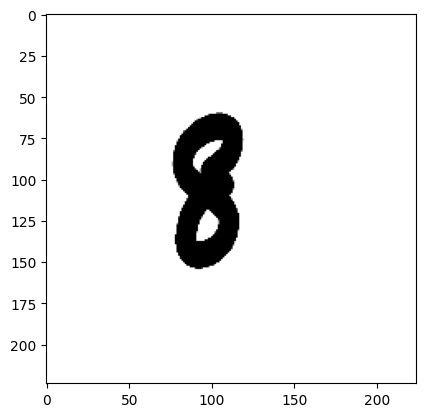

In [52]:
# plotting images
plt.imshow(x_test[0])
print(y_test[0])

In [19]:
x_result = model.predict(x_test)

4/4 [==============================] - 3s 563ms/step


In [20]:
x_result.shape

(100, 10)

In [21]:
raw_preds = np.argmax(x_result,1)

In [22]:
np.argmax(x_result[-1])

4

In [23]:
preds = [ mycls[list(mycls)[i]]  for i  in raw_preds]

In [24]:
print(preds)

[3, 3, 8, 8, 8, 3, 3, 3, 8, 8, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 6, 6, 2, 6, 6, 6, 3, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 5, 3, 3, 3, 5, 3, 5, 5]


In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(preds, y_test)

0.83

## Validation Accuracy 83%

In [ ]:
### Test Set

In [27]:
test_result = []

test_set_path = "/content/project_data/content/project_data/Test_set"
for i in os.listdir(test_set_path):
    img_path = os.path.join(test_set_path,i)
    x = prepro(img_path)
    x = np.expand_dims(x,0)
    result = model.predict(x)
    idx = np.argmax(result)
    cls = mycls[list(mycls)[idx]]
    test_result.append([i.split("_")[0],cls])
    # print(cls, i.split("_")[0])



1/1 [==============================] - 0s 91ms/step


In [28]:
import pandas as pd

In [29]:
pd.DataFrame(test_result, columns= ["name","prediction"])

,name,prediction
0,num9,0
1,num3,6
2,num7,7
3,num5,6
4,num1,1
5,num4,1
6,num8,8
7,num2,6
8,num0,0
9,num6,6


### Generating Images

In [53]:
df = pd.DataFrame.from_dict(dataset)

In [58]:
df[df.cls_name == 8]["image_path"].iloc[0]

'/content/project_data/content/project_data/Validation_data/num8/img009-031.png'

In [92]:
import random


# Rotates an image by a specified angle.
def rotate_image(img, angle):
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    return rotated

# Function to blur an image with a Gaussian filter
def blur_image(img):
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    return blurred

# Function to adjust the brightness of an image
def adjust_brightness(img, brightness_factor):
  img = img.astype(np.float32)
  img = img + brightness_factor
  img = np.clip(img, 0, 255)
  img = img.astype(np.uint8)
  return img

# Function to convert an image to black and white with inverted values
def make_BlacknWhite(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    bw = ~img_gray
    bw = cv2.cvtColor(bw,cv2.COLOR_GRAY2RGB)
    return bw


# Generates a specified number of augmented images for a given class.
def agument(cls,ncount):
    img_name = df[df.cls_name == cls]["image_path"].iloc[0]
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for i in range(ncount):
        angle_range = random.randrange(-30,30,10)
        brightness_range = random.randrange(-100,100,10)

        print(angle_range, brightness_range)
        x1 = rotate_image(img.copy(), angle_range)
        x2 = adjust_brightness(img.copy(),brightness_range)
        x3 = blur_image(img.copy())
        x4 = make_BlacknWhite(img.copy())

        print(x1.shape,x2.shape,x3.shape,x4.shape)
        fig = np.concatenate([x1,x2,x3,x4],1)

        plt.imshow(fig)
        plt.show()
    return



-20 40
(900, 1200, 3) (900, 1200, 3) (900, 1200, 3) (900, 1200, 3)


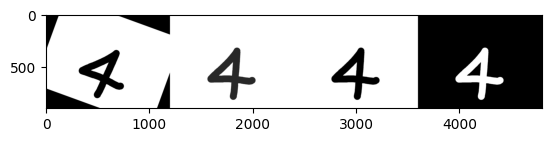

0 10
(900, 1200, 3) (900, 1200, 3) (900, 1200, 3) (900, 1200, 3)


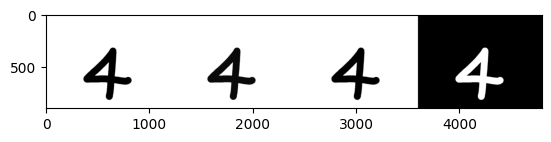

10 -30
(900, 1200, 3) (900, 1200, 3) (900, 1200, 3) (900, 1200, 3)


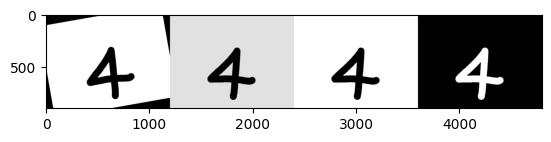

-30 20
(900, 1200, 3) (900, 1200, 3) (900, 1200, 3) (900, 1200, 3)


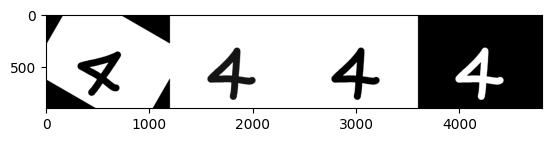

10 40
(900, 1200, 3) (900, 1200, 3) (900, 1200, 3) (900, 1200, 3)


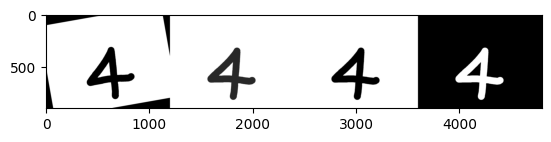

10 -10
(900, 1200, 3) (900, 1200, 3) (900, 1200, 3) (900, 1200, 3)


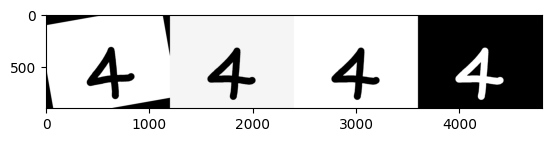

-20 40
(900, 1200, 3) (900, 1200, 3) (900, 1200, 3) (900, 1200, 3)


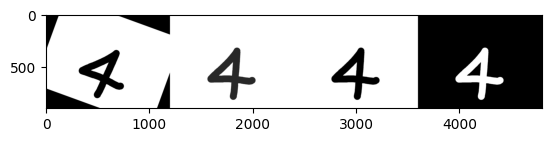

0 70
(900, 1200, 3) (900, 1200, 3) (900, 1200, 3) (900, 1200, 3)


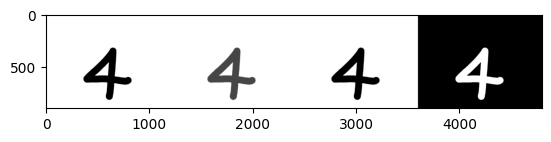

10 -50
(900, 1200, 3) (900, 1200, 3) (900, 1200, 3) (900, 1200, 3)


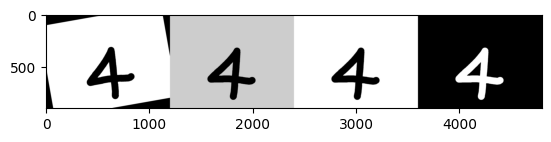

20 40
(900, 1200, 3) (900, 1200, 3) (900, 1200, 3) (900, 1200, 3)


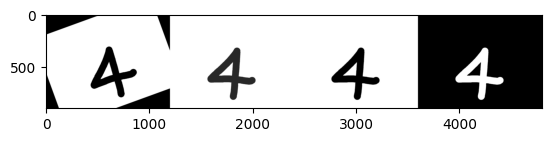

In [94]:
agument(cls=4,ncount=10)